In [31]:
%%capture
!pip install transformers==4.31
!pip install accelerate 
!pip install opencv-python

In [9]:
import torch

from PIL import Image
import pickle
import numpy as np
import cv2
from matplotlib import pyplot as plt

from lavis.models import load_model_and_preprocess

In [2]:
a = 1
with open('masks/mask.pkl', 'wb') as f:
    pickle.dump(a, f)

In [3]:
model, vis_preprocess, txt_preprocess = load_model_and_preprocess("blip_diffusion", "base", device="cuda", is_eval=True)

/opt/conda/envs/pytorch/lib/python3.10/site-packages/diffusers/configuration_utils.py:215: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddpm.DDPMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


No ctx_embeddings_cache found in /home/ubuntu/.cache/torch/hub/checkpoints/blip-diffusion


In [4]:
!ls images

dog_2.jpg  dog_and_cat.jpg  sofa.jpg


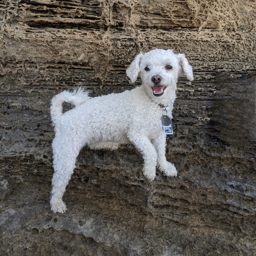

In [5]:
cond_subject = "dog"
src_subject = "cat"
tgt_subject = "dog"

text_prompt = "sit on sofa"

src_subject = txt_preprocess["eval"](src_subject)
tgt_subject = txt_preprocess["eval"](tgt_subject)
cond_subject = txt_preprocess["eval"](cond_subject)
text_prompt = [txt_preprocess["eval"](text_prompt)]

cond_image = Image.open("images/dog_2.jpg").convert("RGB")
display(cond_image.resize((256, 256)))
cond_image = vis_preprocess["eval"](cond_image).unsqueeze(0).cuda()

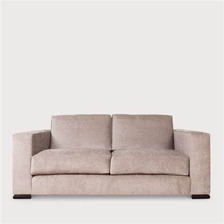

In [6]:
src_image = Image.open("images/sofa.jpg").convert("RGB")
display(src_image.resize((224, 224)))

In [7]:
samples = {
    "cond_images": cond_image,
    "cond_subject": cond_subject,
    "src_subject": src_subject,
    "tgt_subject": tgt_subject,
    "prompt": text_prompt,
    "raw_image": src_image,
}

/home/ubuntu/LAVIS_BLIP/lavis/models/blip_diffusion_models/blip_diffusion.py:331: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  self.unet.in_channels,
/opt/conda/envs/pytorch/lib/python3.10/site-packages/diffusers/configuration_utils.py:215: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddim.DDIMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
100%|███████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.66it/s]


['a cat sit on sofa', 'a sks sks sks sks sks sks sks sks sks sks sks sks sks sks sks sks dog sit on sofa']


  2%|█▏                                                          | 1/50 [00:00<00:18,  2.58it/s]

-----record mask------------
-----record mask------------


  6%|███▌                                                        | 3/50 [00:00<00:14,  3.21it/s]

-----record mask------------


  8%|████▊                                                       | 4/50 [00:01<00:13,  3.30it/s]

-----record mask------------


 10%|██████                                                      | 5/50 [00:01<00:13,  3.35it/s]

-----record mask------------


 12%|███████▏                                                    | 6/50 [00:01<00:13,  3.38it/s]

-----record mask------------


 14%|████████▍                                                   | 7/50 [00:02<00:12,  3.40it/s]

-----record mask------------


 16%|█████████▌                                                  | 8/50 [00:02<00:12,  3.41it/s]

-----record mask------------


 18%|██████████▊                                                 | 9/50 [00:02<00:11,  3.42it/s]

-----record mask------------


 20%|███████████▊                                               | 10/50 [00:02<00:11,  3.43it/s]

-----record mask------------


 22%|████████████▉                                              | 11/50 [00:03<00:11,  3.43it/s]

-----record mask------------


 24%|██████████████▏                                            | 12/50 [00:03<00:11,  3.44it/s]

-----record mask------------


 26%|███████████████▎                                           | 13/50 [00:03<00:10,  3.44it/s]

-----record mask------------


 28%|████████████████▌                                          | 14/50 [00:04<00:10,  3.44it/s]

-----record mask------------


 30%|█████████████████▋                                         | 15/50 [00:04<00:10,  3.44it/s]

-----record mask------------


 32%|██████████████████▉                                        | 16/50 [00:04<00:09,  3.44it/s]

-----record mask------------


 34%|████████████████████                                       | 17/50 [00:05<00:09,  3.44it/s]

-----record mask------------


 36%|█████████████████████▏                                     | 18/50 [00:05<00:09,  3.44it/s]

-----record mask------------


 38%|██████████████████████▍                                    | 19/50 [00:05<00:09,  3.44it/s]

-----record mask------------


 40%|███████████████████████▌                                   | 20/50 [00:05<00:08,  3.44it/s]

-----record mask------------


 42%|████████████████████████▊                                  | 21/50 [00:06<00:08,  3.44it/s]

-----record mask------------


 44%|█████████████████████████▉                                 | 22/50 [00:06<00:08,  3.44it/s]

-----record mask------------


 46%|███████████████████████████▏                               | 23/50 [00:06<00:07,  3.44it/s]

-----record mask------------


 48%|████████████████████████████▎                              | 24/50 [00:07<00:07,  3.44it/s]

-----record mask------------


 50%|█████████████████████████████▌                             | 25/50 [00:07<00:07,  3.44it/s]

-----record mask------------


 52%|██████████████████████████████▋                            | 26/50 [00:07<00:06,  3.44it/s]

-----record mask------------


 54%|███████████████████████████████▊                           | 27/50 [00:07<00:06,  3.44it/s]

-----record mask------------


 56%|█████████████████████████████████                          | 28/50 [00:08<00:06,  3.44it/s]

-----record mask------------


 58%|██████████████████████████████████▏                        | 29/50 [00:08<00:06,  3.44it/s]

-----record mask------------


 60%|███████████████████████████████████▍                       | 30/50 [00:08<00:05,  3.44it/s]

-----record mask------------


 62%|████████████████████████████████████▌                      | 31/50 [00:09<00:05,  3.44it/s]

-----record mask------------


 64%|█████████████████████████████████████▊                     | 32/50 [00:09<00:05,  3.44it/s]

-----record mask------------


 66%|██████████████████████████████████████▉                    | 33/50 [00:09<00:04,  3.44it/s]

-----record mask------------


 68%|████████████████████████████████████████                   | 34/50 [00:09<00:04,  3.44it/s]

-----record mask------------


 70%|█████████████████████████████████████████▎                 | 35/50 [00:10<00:04,  3.44it/s]

-----record mask------------


 72%|██████████████████████████████████████████▍                | 36/50 [00:10<00:04,  3.44it/s]

-----record mask------------


 74%|███████████████████████████████████████████▋               | 37/50 [00:10<00:03,  3.44it/s]

-----record mask------------


 76%|████████████████████████████████████████████▊              | 38/50 [00:11<00:03,  3.44it/s]

-----record mask------------


 78%|██████████████████████████████████████████████             | 39/50 [00:11<00:03,  3.44it/s]

-----record mask------------


 80%|███████████████████████████████████████████████▏           | 40/50 [00:11<00:02,  3.44it/s]

-----record mask------------


 82%|████████████████████████████████████████████████▍          | 41/50 [00:12<00:02,  3.44it/s]

-----record mask------------


 84%|█████████████████████████████████████████████████▌         | 42/50 [00:12<00:02,  3.44it/s]

-----record mask------------


 86%|██████████████████████████████████████████████████▋        | 43/50 [00:12<00:02,  3.44it/s]

-----record mask------------


 88%|███████████████████████████████████████████████████▉       | 44/50 [00:12<00:01,  3.44it/s]

-----record mask------------


 90%|█████████████████████████████████████████████████████      | 45/50 [00:13<00:01,  3.44it/s]

-----record mask------------


 92%|██████████████████████████████████████████████████████▎    | 46/50 [00:13<00:01,  3.43it/s]

-----record mask------------


 94%|███████████████████████████████████████████████████████▍   | 47/50 [00:13<00:00,  3.43it/s]

-----record mask------------


 96%|████████████████████████████████████████████████████████▋  | 48/50 [00:14<00:00,  3.43it/s]

-----record mask------------


 98%|█████████████████████████████████████████████████████████▊ | 49/50 [00:14<00:00,  3.43it/s]

-----record mask------------


100%|███████████████████████████████████████████████████████████| 50/50 [00:14<00:00,  3.42it/s]

-----record mask------------


Before editing:


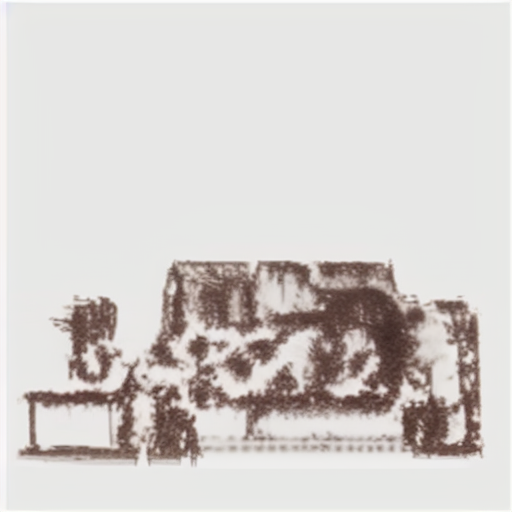

After editing:


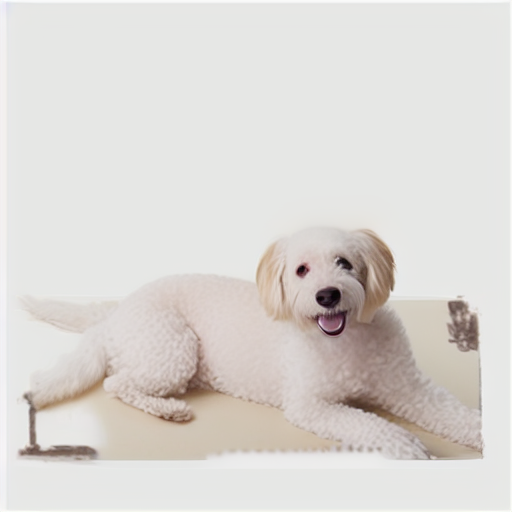

In [8]:
iter_seed = 88871
guidance_scale = 7.5
num_inference_steps = 50
num_inversion_steps = 50 # increase to improve DDIM inversion quality
negative_prompt = "over-exposure, under-exposure, saturated, duplicate, out of frame, lowres, cropped, worst quality, low quality, jpeg artifacts, morbid, mutilated, out of frame, ugly, bad anatomy, bad proportions, deformed, blurry, duplicate"

output = model.edit(
    samples,
    seed=iter_seed,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    num_inversion_steps=num_inversion_steps,
    neg_prompt=negative_prompt,
)

print("=" * 30)
print("Before editing:")
display(output[0])

print("After editing:")
display(output[1])

In [2]:
with open("/home/ubuntu/LAVIS_BLIP/masks/mask_1", 'rb') as f:
    masks = pickle.load(f)

In [3]:
masks.size()

torch.Size([1, 1, 64, 64])

In [4]:
mask = masks.squeeze().cpu()

In [5]:
np_mask = mask.numpy()

In [15]:
norm_mask = np_mask / np_mask.max()

In [11]:
cond_image_raw = Image.open("images/dog_2.jpg").convert("RGB")

In [13]:
result = (np_mask * cond_image_raw.resize((64, 64))).astype("uint8")

ValueError: operands could not be broadcast together with shapes (64,64) (64,64,3) 

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 16))

ax1.set_title('Original')
ax2.set_title('Attention Map')
ax3.set_title('Raw Mask')
_ = ax1.imshow(cond_image)
_ = ax2.imshow(result)
_ = ax3.imshow(mask)

In [22]:
grid_size = int(np.sqrt(mask.size(-1)))
mask = mask[0, :].reshape(grid_size, grid_size).detach().numpy()
mask = cv2.resize(mask / mask.max(), raw_image.size)[..., np.newaxis]
result = (mask * raw_image).astype("uint8")

NameError: name 'v' is not defined

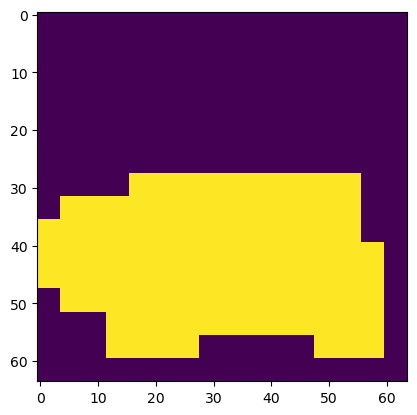

In [16]:
plt.imshow(norm_mask)